## Identifying Cues on Internal States from the Movements of Natural Social Interactions

**Dataset analysis**


## Analysis setup

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
#%matplotlib notebook
#%matplotlib qt5
%matplotlib inline
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # bigger figures

import seaborn as sns
sns.set() # better looking figs

/home/s-lemaignan/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# our own set of small helper functions for plotting, etc
from utils import plot_embedding, plot_compare_embeddings, show_heatmap, plot_confusion_matrix

Load dataset, rename and re-order columns where necessary. *Note that the participants who failed the attention check were excluded, and are not present in the dataset.*

In [6]:
data = pd.read_csv("../fulldata.csv")
data["clipId"] = data["clipName"].apply(lambda x: x[-8:-6])

# re-order columns + keep only useful ones
data = data[['pptID','fileName', 'condition', 'age', 'gender', 'nationality', 'firstLang', 'trial', 'clipId', 'freetext',
 'q01', 'q02', 'q03', 'q04', 'q05', 'q06', 'q07', 'q08', 'q09', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17',
 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30']]

Rename `qXX` columns with the names of the actual constructs tested in the questionnaire.

Notes:
- `condition=1` is the 'Movement-only' (ie, skeletons) condition, `condition=2` is the 'Full-scene' condition
- each participant `pptID` watched 4 different clips, hence 4 rows per participant

In [7]:
constructs=["Sad", "Happy", "Angry", "Excited", "Calm", "Friendly", "Aggressive", "Engaged", "Distracted", "Bored", "Frustrated","Dominant","Submissive"]

index = data.columns.tolist()
index = index[0:10] + ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + [c for c1 in constructs for c in ['left' + c1, 'right' + c1]]
data.columns=index
data

,pptID,fileName,condition,age,gender,nationality,firstLang,trial,clipId,freetext,...,leftDistracted,rightDistracted,leftBored,rightBored,leftFrustrated,rightFrustrated,leftDominant,rightDominant,leftSubmissive,rightSubmissive
0,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,1,04,PLAY TOGETHER THE CARD GAME TO ENJOY THEM . IN...,...,2,2,1,2,1,2,2,2,2,2
1,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,2,09,PLAYING TOGETHER FOR TWO CHILDREN . TO PLAY CA...,...,3,4,3,3,3,4,3,4,3,3
2,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,3,16,PLAYING TOGETHER THE GAME. PLAY TO LEARNING TH...,...,3,4,3,3,3,3,3,4,3,3
3,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,4,02,PLAYING TO LEARNING TOGETHER. TO PLAY INTEREST...,...,3,4,3,3,2,2,3,3,3,3
4,94,10kinos8b34va6_data.csv,1,23,Male,American,English,1,15,I notice that they slow down towards the end m...,...,1,1,2,1,1,2,2,2,2,2
5,94,10kinos8b34va6_data.csv,1,23,Male,American,English,2,02,The child on the right seems to be taking over...,...,1,0,1,1,1,3,4,1,3,0
6,94,10kinos8b34va6_data.csv,1,23,Male,American,English,3,08,"Both seem pretty calm, but the child on the le...",...,4,1,4,1,2,1,1,2,3,2
7,94,10kinos8b34va6_data.csv,1,23,Male,American,English,4,11,These children seem to be working together pre...,...,1,1,1,1,1,1,2,2,1,1
8,155,10kinqv5zq7rl5_data.csv,2,28,Male,American,English,1,12,They got along quite well and helped each othe...,...,0,4,3,2,2,4,2,2,4,2
9,155,10kinqv5zq7rl5_data.csv,2,28,Male,American,English,2,07,They played separately largely. They were fine...,...,3,0,4,1,3,4,3,3,0,2


## Pre-processing

For each left/right pair of constructs, compute the absolute difference and the sum (shifted to [-2, +2] interval).

This provides insight on the imbalance of the given construct between the children (difference), and the overall 'strenght' of the construct in the clip (sum).

In [8]:
for c in constructs:
    data["diff"+c] = abs(data["left" + c] - data["right" + c])
    data["sum"+c] = data["left" + c] + data["right" + c] - 4
   

Create 2 lists of columns names, one for diff/sum constructs (the main one), one for left/right constructs.

In [9]:
columnsLeftRight=[]
columnsDiffSum=[]

for c in constructs:
    columnsLeftRight.append("left" + c)
    columnsLeftRight.append("right" + c)
    
    columnsDiffSum.append("diff" + c)
    columnsDiffSum.append("sum" + c)


# by default, work with differences & sum for each constructs
selectedColumns=columnsDiffSum

# work with differences & sum and the four questions about group dynamics
allQuestionsDiffSum = ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + columnsDiffSum

# work with left/right ratings and the four questions about group dynamics i.e. raw ratings
allQuestionsLeftRight = ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + columnsLeftRight

Define several useful 'partial' views of the data.

In [10]:
#FULL-SCENE DATA

fullscene_df=data[data["condition"]==2] # dataframe showing full scene data only

# the responses to the 26 left/right Likert-scale questions
fullscene_ratings_df=fullscene_df[selectedColumns].astype(float)
fullscene=fullscene_ratings_df.values # the underlying numpy array, needed for clustering

# clip names
fullscene_labels=fullscene_df["clipId"].values

# mean ratings per clip
fullscene_means=fullscene_df.groupby(["clipId"]).mean()[selectedColumns]

In [11]:
#MOVEMENT-ALONE DATA

move_df=data[data["condition"]==1] # dataframe showing movement alone data only

# the responses to the 26 left/right Likert-scale questions
move_ratings_df=move_df[selectedColumns].astype(float)
move=move_ratings_df.values # the underlying numpy array, needed for clustering

# clip names
move_labels=move_df["clipId"].values

# mean ratings per clip
move_means=move_df.groupby(["clipId"]).mean()[selectedColumns]

# Section 3.1: Inter-Rater Agreement

Calculate Kirppendorff's alpha to look at how much participants in each condition agreed on their ratings for each clip (lighter color means higher agreement).

In [82]:
import krippendorff

krip={}

for clipName, group in fullscene_df[["clipId"] + allQuestionsLeftRight].groupby(["clipId"]): # working with all raw ratings
    krip[clipName]=(krippendorff.alpha(group.values[:,1:].astype(int),level_of_measurement='interval'), group.shape[0])

for clipName, group in move_df[["clipId"] + allQuestionsLeftRight].groupby("clipId"):
    krip[clipName]=krip[clipName] + (krippendorff.alpha(group.values[:,1:].astype(int),level_of_measurement='interval'), group.shape[0])

for clipName, group in move_df[["clipId"] + allQuestionsLeftRight].groupby("clipId"):
    ratings = group.values[:,1:].astype(int)
    ratings = np.random.randint(0,5,ratings.shape)
    krip[clipName]=krip[clipName] + (krippendorff.alpha(ratings,level_of_measurement='interval'), group.shape[0])

    
krippendorff_df=pd.DataFrame.from_dict(krip,orient="index", columns=["Fullscene alpha", "N", "Movement-Alone alpha", "N","Random ratings alpha", "N"])

show_heatmap(krippendorff_df[["Fullscene alpha", "Movement-Alone alpha", "Random ratings alpha"]].round(3), cmap="summer")

,Fullscene alpha,Movement-Alone alpha,Random ratings alpha
01,0.446,0.186,0.004
02,0.181,0.27,0.002
03,0.393,0.369,0.013
04,0.444,0.262,-0.01
05,0.328,0.283,-0.024
06,0.463,0.359,-0
07,0.091,0.236,0.003
08,0.339,0.312,-0
09,0.097,0.058,0.024
10,0.396,0.086,-0.004


Comparing the agreement scores in the fullscene vs movement-alone videos, using an Independent Samples T-test. 

Question: did participants in the fullscene condition agree more in their ratings of each clip than participants in the movement-alone condition?

In [64]:
from scipy.stats import ttest_rel
from math import sqrt

fullscene_krip = krippendorff_df["Fullscene alpha"]
move_krip = krippendorff_df["Movement-Alone alpha"]

print('Mean Kripp Alpha Fullscene:', fullscene_krip.mean())
print('Mean Kripp Alpha Movement:', move_krip.mean())

print('Paired Samples T-Test:', ttest_rel(fullscene_krip, move_krip))

cohens_d = (fullscene_krip.mean() - move_krip.mean()) / (sqrt((fullscene_krip.std() ** 2 + move_krip.std() ** 2) / 2))

print("Cohen's d:", cohens_d)

Mean Kripp Alpha Fullscene: 0.32795503407453647
Mean Kripp Alpha Movement: 0.2516871430686377
Paired Samples T-Test: Ttest_relResult(statistic=2.955422785203005, pvalue=0.008124095387554918)
Cohen's d: 0.7763181922755465


Chance level for Krippendorff's alpha, computed by replacing ratings for each clips and each conditions by random values, and averaging the results:

In [81]:
krip_max = 0

for i in range(100):
    krip_chance={}

    for clipName, group in fullscene_df[["clipId"] + allQuestionsLeftRight].groupby(["clipId"]): # working with all raw ratings
        ratings = group.values[:,1:].astype(int)
        ratings = np.random.randint(0,5,ratings.shape)
        krip_chance[clipName]=(krippendorff.alpha(ratings,level_of_measurement='interval'), group.shape[0])

    for clipName, group in move_df[["clipId"] + allQuestionsLeftRight].groupby("clipId"):
        ratings = group.values[:,1:].astype(int)
        ratings = np.random.randint(0,5,ratings.shape)
        krip_chance[clipName]=krip_chance[clipName] + (krippendorff.alpha(ratings,level_of_measurement='interval'), group.shape[0])


    krippendorff_df=pd.DataFrame.from_dict(krip_chance,orient="index", columns=["Fullscene alpha", "N", "Movement-Alone alpha", "N"])
    k = krippendorff_df[["Fullscene alpha", "Movement-Alone alpha"]].values.mean()
    if k > krip_max:
        krip_max = k
krip_max


0.005361458226764942

# 3.2 Automatic Labelling of Social Situations

Multi-label classification using k-nearest neughbour (k=3). 

**Note:** Values based on results from Classifier are subject to changes each time Classifier is run. As such, running the following analyses will not produce identical results to those reported in *Paper* but will produce similar results.

In [10]:
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer



training_ground_truth = { '01': ['Aggressive'],
                         '02': ['Excited', 'Aggressive', 'Aimless'],
                         '03': ['Excited', 'Fun'],
                         '04': ['Cooperative'],
                         '05': ['Bored', 'Aimless'],
                         '06': ['Cooperative'],
                         '07': ['Dominant'],
                         '08': ['Bored', 'Fun'],
                         '09': ['Cooperative'],
                         '10': ['Cooperative', 'Dominant'],
                         '11': ['Cooperative', 'Dominant'],
                         '12': ['Aggressive', 'Aimless'],
                         '13': ['Excited', 'Aggressive', 'Aimless'],
                         '14': ['Aggressive'],
                         '15': ['Dominant'],
                         '16': ['Cooperative', 'Dominant'],
                         '17': ['Excited', 'Aggressive'],
                         '18': ['Aggressive', 'Dominant'],
                         '19': ['Dominant'],
                         '20': ['Excited']}

mlb = MultiLabelBinarizer()
mlb.fit(training_ground_truth.values())

def datasets(training=data, testing=None, cols=allQuestionsDiffSum, test_size=0.2, use_clip_id_as_label=False, random_labels=False):
    """Returns a training dataset and training labels, and a testing dataset and testing labels.
    
    If testing is None, it randomly splits the training dataframe (at test_size).
    """


    if testing is None:
        
        if use_clip_id_as_label:
            labels = list(training["clipId"].map(int))
        else:
            labels = []
            for id in training["clipId"]:
                labels.append(training_ground_truth[id])

        data = training[cols].values

        training_data, testing_data, training_labels, testing_labels = train_test_split(data, labels, test_size=test_size, random_state=int(time.time()))

        if not use_clip_id_as_label:
            
            training_labels, testing_labels = mlb.transform(training_labels), mlb.transform(testing_labels)
            
            if random_labels:
                for labels in training_labels:
                    np.random.shuffle(labels)                 
                np.random.shuffle(training_labels)             
            

        return training_data, testing_data, training_labels, testing_labels
    
    else:
        
        if use_clip_id_as_label:
            training_labels = list(training["clipId"].map(int))
            testing_labels = list(testing["clipId"].map(int))
        else:
            labels = []
            for id in training["clipId"]:
                labels.append(training_ground_truth[id])

            training_labels = mlb.transform(labels)

            labels = []
            for id in testing["clipId"]:
                labels.append(training_ground_truth[id])

            testing_labels = mlb.transform(labels)

            if random_labels:
                if random_labels:
                    for labels in training_labels:
                        np.random.shuffle(labels)                 
                    np.random.shuffle(training_labels) 

        
        training_data = training[cols].values
        testing_data = testing[cols].values

        return training_data, testing_data, training_labels, testing_labels

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

def train(training_data, training_labels, layers_nb=3, layer_size=20):
    
    #clf = RandomForestClassifier()
    clf = KNeighborsClassifier(n_neighbors=3)
    #clf = ExtraTreeClassifier(random_state=0)

    layers = (layer_size, ) * layers_nb
    #print("Training a MLP classifier, layers: %s..." % str(layers))

    # => naively using a OneVsRestClassifier does not improve the classification results, on the contrary
    #clf = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=layers, activation='relu', max_iter=1000, solver="lbfgs"))
    
    #clf = MLPClassifier(hidden_layer_sizes=layers, activation='relu', max_iter=1000, solver="lbfgs")
    #clf = OneVsRestClassifier(SVC(kernel='rbf'))
    
    clf.fit(training_data, training_labels)
    
    return clf

def predict(clf, testing_data, inverse_transform_labels=True):
    p = clf.predict(testing_data)
    if inverse_transform_labels:
        return mlb.inverse_transform(p) 
    else:
        return p

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
import sklearn
import sklearn.metrics as metrics

def run_classification(training, 
                       testing=None, 
                       cols=allQuestionsDiffSum, 
                       use_clip_id_as_label=False, 
                       random_labels=False,
                       layers_nb=3,
                       layer_size=20,
                       iterations=50):
    """
    Metrics for multi-label classification coming form Sorower, Mohammad S. "A literature survey on algorithms for multi-label learning." Oregon State University, Corvallis (2010).
    """
    
    results = {"Accuracy": [],
               #"Jaccard similarity" : [], # intersection over union
              "Precision": [],
               "Recall": [],
              "F1-measure": []}              
              #"hamming_loss": []} # not super useful, because as we have 'only' 7 labels, the hamming distance is never huge (max 7, and usually smaller), which make it a not-very-sensitive measure
    labels_f1 = []
    

    for x in range(iterations):
               
        training_data, testing_data, training_labels, testing_labels = datasets(training=training, testing=testing, cols=cols, use_clip_id_as_label=use_clip_id_as_label, random_labels=random_labels)
        
        if x == 0:
            print("Shape of training data: %s" % str(training_data.shape))
            print("Shape of testing data: %s" % str(testing_data.shape))

        #print("Fold %d/%d" % (x+1, iterations))
        
        clf = train(training_data, training_labels, layers_nb=layers_nb, layer_size=layer_size)

        #mean_score_exact += clf.score(testing_data, testing_labels)

        pred_labels = predict(clf, testing_data, inverse_transform_labels = not use_clip_id_as_label)


        
        at_least_one = 0
        at_least_one_no_incorrect = 0
        
        if not use_clip_id_as_label:
            
            nb_classes = len(mlb.classes_)
            
            labels_f1.append(dict(zip(mlb.classes_, metrics.f1_score(testing_labels, mlb.transform(pred_labels), average=None))))
            
            results["Accuracy"].append(metrics.accuracy_score(testing_labels, mlb.transform(pred_labels)))
            #results["Jaccard similarity"].append(metrics.jaccard_similarity_score(testing_labels, mlb.transform(pred_labels)))
            results["Precision"].append(metrics.precision_score(testing_labels, mlb.transform(pred_labels), average='weighted'))    
            results["Recall"].append(metrics.recall_score(testing_labels, mlb.transform(pred_labels), average='weighted'))    
            results["F1-measure"].append(metrics.f1_score(testing_labels, mlb.transform(pred_labels), average='weighted'))    
            #results["hamming_loss"].append(metrics.hamming_loss(testing_labels, mlb.transform(pred_labels)))    
            
            
            testing_labels = mlb.inverse_transform(testing_labels)
            
            exact = 0
            accuracy = 0
            precision = 0
            recall = 0
            f1_measure = 0
            
            for actual, pred in zip(testing_labels, pred_labels):
                
                pred = set(pred)
                actual = set(actual)
                
                if len(pred) == 0: continue
                    
                if pred == actual:
                    #print("%s <-> %s" % (actual, pred))
                    exact += 1
                    
                intersection = pred.intersection(actual)
                union = pred.union(actual)

                #accuracy += float(len(intersection)) / len(union)
                #precision += float(len(intersection)) / len(pred)
                #recall += float(len(intersection)) / len(actual)
                #f1_measure += 2 * float(len(intersection)) / (len(pred) + len(actual))
                
            
            #results["exact"].append(float(exact) / len(testing_labels))
            #results["accuracy"].append(accuracy / len(testing_labels))
            #results["precision"].append(precision / len(testing_labels))
            #results["recall"].append(recall / len(testing_labels))
            #results["f1_measure"].append(f1_measure / len(testing_labels))
            
            
            
        else: # use_clip_id_as_label = True
            # does not make much sense as at_least_one & at_least_one_no_incorrect are the same as 'exact'
            pass

    return pd.DataFrame(results), pd.DataFrame(labels_f1)

MLP hyperparameters optimisation using a grid search

In [13]:
res = {}
for nb in range(1,6):
    for size in range(2,21,2): 
        results_fullscene,labels_precision_fullscene = run_classification(fullscene_df, iterations=30,layers_nb=nb, layer_size=size)
        res["(%d x %d)" % (nb, size)] = results_fullscene

grid_search=pd.concat(res, axis=1)
grid_search.describe()

Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of t

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicte

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicte

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicte

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicte

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicte

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Shape of training data: (316, 30)
Shape of testing data: (80, 30)


(1 x 10)                                       (1 x 12)             \
        Accuracy  Precision     Recall F1-measure      Accuracy  Precision   
count  30.000000  30.000000  30.000000  30.000000  3.000000e+01  30.000000   
mean    0.166250   0.433401   0.296324   0.335207  1.625000e-01   0.398938   
std     0.005826   0.053543   0.037699   0.050476  2.823006e-17   0.000000   
min     0.162500   0.398938   0.272059   0.302718  1.625000e-01   0.398938   
25%     0.162500   0.398938   0.272059   0.302718  1.625000e-01   0.398938   
50%     0.162500   0.398938   0.272059   0.302718  1.625000e-01   0.398938   
75%     0.175000   0.513815   0.352941   0.411014  1.625000e-01   0.398938   
max     0.175000   0.513815   0.352941   0.411014  1.625000e-01   0.398938   

                                       (1 x 14)               ...      \
             Recall    F1-measure      Accuracy  Precision    ...       
count  3.000000e+01  3.000000e+01  3.000000e+01  30.000000    ...       
mean   2.720588e-01  3.027181e-01  1.625000e-01   0.398938    ...       
std    1.693804e-16  5.646013e-17  2.823006e-17   0.000000    ...       
min    2.720588e-01  3.027181e-01  1.625000e-01   0.398938    ...       
25%    2.720588e-01  3.027181e-01  1.625000e-01   0.398938    ...       
50%    2.720588e-01  3.027181e-01  1.625000e-01   0.398938    ...       
75%    2.720588e-01  3.027181e-01  1.625000e-01   0.398938    ...       
max    2.720588e-01  3.027181e-01  1.625000e-01   0.398938    ...       

         (5 x 4)                  (5 x 6)                                      \
          Recall F1-measure      Accuracy     Precision     Recall F1-measure   
count  30.000000  30.000000  3.000000e+01  3.000000e+01  30.000000  30.000000   
mean    0.328125   0.348939  1.750000e-01  4.168129e-01   0.328125   0.348939   
std     0.000000   0.000000  8.469019e-17  1.129203e-16   0.000000   0.000000   
min     0.328125   0.348939  1.750000e-01  4.168129e-01   0.328125   0.348939   
25%     0.328125   0.348939  1.750000e-01  4.168129e-01   0.328125   0.348939   
50%     0.328125   0.348939  1.750000e-01  4.168129e-01   0.328125   0.348939   
75%     0.328125   0.348939  1.750000e-01  4.168129e-01   0.328125   0.348939   
max     0.328125   0.348939  1.750000e-01  4.168129e-01   0.328125   0.348939   

         (5 x 8)                                   
        Accuracy  Precision     Recall F1-measure  
count  30.000000  30.000000  30.000000  30.000000  
mean    0.160000   0.410198   0.336269   0.354548  
std     0.018685   0.008240   0.010145   0.006986  
min     0.137500   0.400276   0.328125   0.348939  
25%     0.137500   0.400276   0.328125   0.348939  
50%     0.175000   0.416813   0.328125   0.348939  
75%     0.175000   0.416813   0.348485   0.362960  
max     0.175000   0.416813   0.348485   0.362960  

[8 rows x 200 columns]

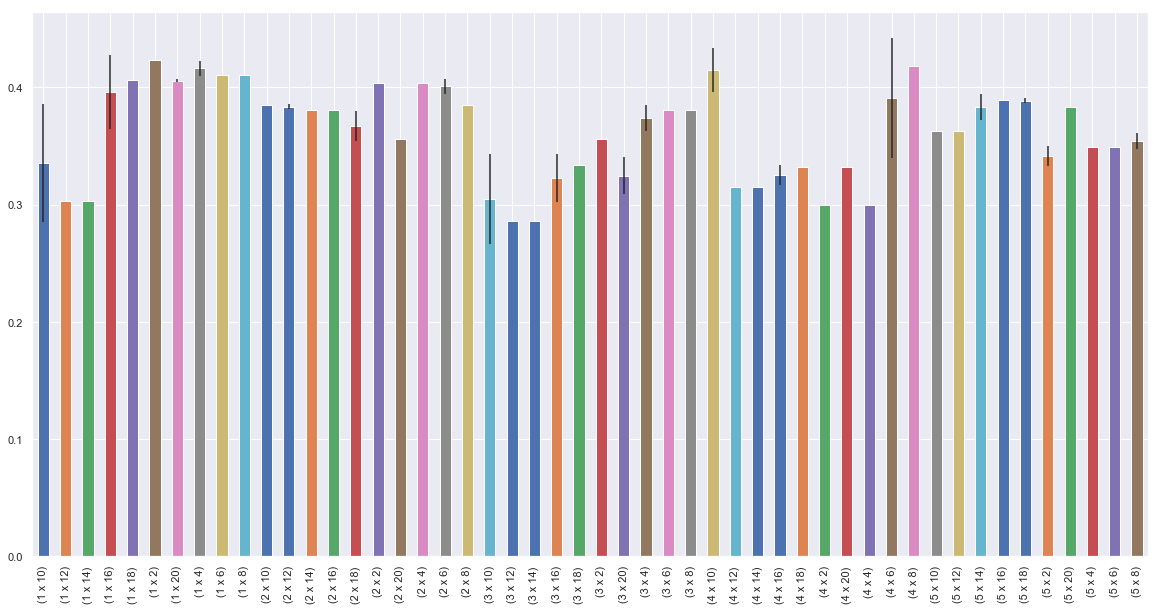

In [14]:
accuracy_over_grid = grid_search.swaplevel(axis=1)["F1-measure"].describe().transpose()
accuracy_over_grid["mean"].plot.bar(yerr=accuracy_over_grid["std"])

In [15]:
results_fullscene,labels_precision_fullscene = run_classification(fullscene_df, iterations=10,layers_nb=1, layer_size=6)
results_fullscene.describe()

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


,Accuracy,Precision,Recall,F1-measure
count,10.00000,10.000000,10.000000,10.000000
mean,0.21625,0.532201,0.379491,0.437135
std,0.02767,0.029237,0.018006,0.024851
min,0.13750,0.448991,0.328244,0.366407
25%,0.22500,0.541446,0.385185,0.444994
50%,0.22500,0.541446,0.385185,0.444994
75%,0.22500,0.541446,0.385185,0.444994
max,0.22500,0.541446,0.385185,0.444994


### Fullscene classification - 80%/20% split - multi-label

In [16]:
results, labels_f1_fs = run_classification(fullscene_df, iterations=20)
results.describe()

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


,Accuracy,Precision,Recall,F1-measure
count,20.000,2.000000e+01,2.000000e+01,2.000000e+01
mean,0.225,5.414462e-01,3.851852e-01,4.449941e-01
std,0.000,1.139065e-16,5.695324e-17,5.695324e-17
min,0.225,5.414462e-01,3.851852e-01,4.449941e-01
25%,0.225,5.414462e-01,3.851852e-01,4.449941e-01
50%,0.225,5.414462e-01,3.851852e-01,4.449941e-01
75%,0.225,5.414462e-01,3.851852e-01,4.449941e-01
max,0.225,5.414462e-01,3.851852e-01,4.449941e-01


In [17]:
fs = labels_f1_fs.describe()
fs

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,2.000000e+01,20.0,2.000000e+01,20.000000,2.000000e+01,20.000000,20.0
mean,4.905660e-01,0.5,5.882353e-01,0.457143,4.000000e-01,0.432432,0.0
std,1.708597e-16,0.0,1.139065e-16,0.000000,1.139065e-16,0.000000,0.0
min,4.905660e-01,0.5,5.882353e-01,0.457143,4.000000e-01,0.432432,0.0
25%,4.905660e-01,0.5,5.882353e-01,0.457143,4.000000e-01,0.432432,0.0
50%,4.905660e-01,0.5,5.882353e-01,0.457143,4.000000e-01,0.432432,0.0
75%,4.905660e-01,0.5,5.882353e-01,0.457143,4.000000e-01,0.432432,0.0
max,4.905660e-01,0.5,5.882353e-01,0.457143,4.000000e-01,0.432432,0.0


### Fullscene classification - 80%/20% split - multi-label - CHANCE level

The chance level is computed by associating random labels to the testing samples (still following the same distribution of labels as found in the original dataset).

Need to implement new chance calculation following recommendations of Reviewer.

In [18]:
results_chance, labels_f1_fschance = run_classification(fullscene_df, random_labels=True, iterations=20)
results_chance.describe()

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


,Accuracy,Precision,Recall,F1-measure
count,20.000000,20.000000,20.000000,20.000000
mean,0.034375,0.275074,0.136296,0.172520
std,0.016660,0.065147,0.027861,0.037940
min,0.000000,0.116430,0.074074,0.084712
25%,0.025000,0.244481,0.131481,0.164215
50%,0.037500,0.290051,0.140741,0.181561
75%,0.040625,0.316055,0.148148,0.189781
max,0.062500,0.398453,0.185185,0.232246


In [19]:
fschance = labels_f1_fschance.describe()
fschance

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.181673,0.171364,0.094908,0.178395,0.219869,0.155698,0.110054
std,0.098002,0.097556,0.110510,0.081414,0.086115,0.067568,0.084320
min,0.000000,0.000000,0.000000,0.066667,0.062500,0.000000,0.000000
25%,0.108108,0.072797,0.000000,0.120833,0.182258,0.116807,0.057692
50%,0.164414,0.176471,0.085455,0.176471,0.222222,0.147849,0.105556
75%,0.236111,0.258097,0.149573,0.223214,0.256410,0.201282,0.166667
max,0.355556,0.333333,0.333333,0.322581,0.368421,0.294118,0.285714


### Fullscene training; movement alone testing - multi-labels

In [20]:
results, labels_f1_ma = run_classification(fullscene_df, testing=move_df, iterations=20)
results.describe()

Shape of training data: (396, 30)
Shape of testing data: (400, 30)


,Accuracy,Precision,Recall,F1-measure
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,1.575000e-01,4.161017e-01,3.267176e-01,3.625993e-01
std,5.695324e-17,1.708597e-16,5.695324e-17,1.139065e-16
min,1.575000e-01,4.161017e-01,3.267176e-01,3.625993e-01
25%,1.575000e-01,4.161017e-01,3.267176e-01,3.625993e-01
50%,1.575000e-01,4.161017e-01,3.267176e-01,3.625993e-01
75%,1.575000e-01,4.161017e-01,3.267176e-01,3.625993e-01
max,1.575000e-01,4.161017e-01,3.267176e-01,3.625993e-01


In [21]:
ma = labels_f1_ma.describe()
ma

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,0.437276,1.935484e-01,5.846154e-01,2.959184e-01,4.338235e-01,3.121387e-01,2.745098e-01
std,0.000000,5.695324e-17,2.278130e-16,5.695324e-17,5.695324e-17,1.139065e-16,5.695324e-17
min,0.437276,1.935484e-01,5.846154e-01,2.959184e-01,4.338235e-01,3.121387e-01,2.745098e-01
25%,0.437276,1.935484e-01,5.846154e-01,2.959184e-01,4.338235e-01,3.121387e-01,2.745098e-01
50%,0.437276,1.935484e-01,5.846154e-01,2.959184e-01,4.338235e-01,3.121387e-01,2.745098e-01
75%,0.437276,1.935484e-01,5.846154e-01,2.959184e-01,4.338235e-01,3.121387e-01,2.745098e-01
max,0.437276,1.935484e-01,5.846154e-01,2.959184e-01,4.338235e-01,3.121387e-01,2.745098e-01


### Fullscene training; movement alone testing - multi-labels - CHANCE level

The chance level is computed by associating random labels to the testing samples (still following the same distribution of labels as found in the original dataset).

Need to implement new chance calculation following recommendations of Reviewer.

In [22]:
results, labels_f1_machance = run_classification(fullscene_df, testing=move_df, random_labels=True, iterations=20)
results.describe()

Shape of training data: (396, 30)
Shape of testing data: (400, 30)


,Accuracy,Precision,Recall,F1-measure
count,20.000000,20.000000,20.000000,20.000000
mean,0.037125,0.271387,0.140153,0.176284
std,0.010172,0.028824,0.020124,0.025063
min,0.020000,0.212189,0.099237,0.125779
25%,0.031875,0.259997,0.128244,0.164584
50%,0.036250,0.274442,0.141221,0.176739
75%,0.043125,0.290561,0.153053,0.193445
max,0.057500,0.318757,0.180153,0.223607


In [23]:
machance = (labels_f1_machance.describe())
machance

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.184803,0.162139,0.090350,0.200428,0.181003,0.196939,0.102014
std,0.076580,0.043466,0.052673,0.056718,0.057240,0.040435,0.044562
min,0.080460,0.058824,0.000000,0.059701,0.083333,0.125000,0.025000
25%,0.128956,0.146584,0.057154,0.166323,0.145265,0.170377,0.065873
50%,0.166627,0.166063,0.080312,0.197649,0.179571,0.183848,0.105336
75%,0.242310,0.184634,0.131063,0.246992,0.222135,0.230120,0.125329
max,0.319328,0.233766,0.189189,0.275132,0.280374,0.274725,0.207547


## Figure of mean f1 for each label in each condition

(0, 1)

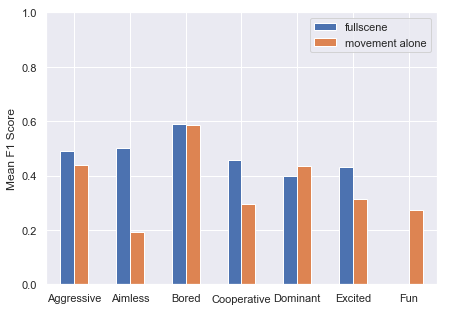

In [24]:
fs_mean = fs.iloc[[1]].T
ma_mean = ma.iloc[[1]].T

f1_mean = pd.concat([fs_mean['mean'], ma_mean['mean']], axis=1, keys=['fullscene', 'movement alone'])
f1_mean
ax = f1_mean.plot.bar(rot=0, figsize=(7,5)) #plot
ax.set_ylabel("Mean F1 Score")
ax.set_ylim(0,1)

In [25]:
fs_mean_chance = fschance.iloc[[1]].T
ma_mean_chance = machance.iloc[[1]].T
f1_mean_chance = pd.concat([fs_mean['mean'], fs_mean_chance['mean'], ma_mean['mean'], ma_mean_chance['mean']], axis=1, keys=['Fullscene', 'Fullscene Chance', 'Movement Alone', 'Movement Alone Chance'])

print((f1_mean_chance).round(2).transpose().to_latex(bold_rows=True))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  Aggressive &  Aimless &  Bored &  Cooperative &  Dominant &  Excited &   Fun \\
\midrule
\textbf{Fullscene            } &        0.49 &     0.50 &   0.59 &         0.46 &      0.40 &     0.43 &  0.00 \\
\textbf{Fullscene Chance     } &        0.18 &     0.17 &   0.09 &         0.18 &      0.22 &     0.16 &  0.11 \\
\textbf{Movement Alone       } &        0.44 &     0.19 &   0.58 &         0.30 &      0.43 &     0.31 &  0.27 \\
\textbf{Movement Alone Chance} &        0.18 &     0.16 &   0.09 &         0.20 &      0.18 &     0.20 &  0.10 \\
\bottomrule
\end{tabular}



# 3.3 Factor Analysis

Exploratory Factor Analysis examining what latent constructs underlie particiants' responses in each condition.

The Python factor_analyzer module is a port of EFA from the R' psych package.

In [26]:
import factor_analyzer

rotation = 'promax'

nb_factors=3

efa_fullscene = factor_analyzer.FactorAnalyzer()
efa_fullscene.analyze(fullscene_ratings_df, nb_factors, rotation=rotation)
fullscene_loadings=efa_fullscene.loadings

efa_move = factor_analyzer.FactorAnalyzer()
efa_move.analyze(move_ratings_df, nb_factors, rotation=rotation)
move_loadings=efa_move.loadings

Comparing the loadings for the *fullscene* vs the *movement alone* data show that the first three factors are highly correlated. **This shows that, using factor analysis, we have uncovered latent constructs that are used by participants to describe the clips in both *fullscene* and *movement alone* conditions**.

In [27]:
# merge loadings into one dataframe, movement alone and fullscene side-by-side
loadings=pd.concat([fullscene_loadings, move_loadings], keys=["fullscene","movement alone"], axis=1)
loadings=loadings.swaplevel(0,1,1).sort_index(1)

from scipy.stats import pearsonr

print("Pearson correlation between factors 'fullscene' vs 'movement alone'")
for i in range(1, nb_factors+1):
    r, p=pearsonr(loadings["Factor%d" % i]["fullscene"].values, loadings["Factor%d" % i]["movement alone"].values)
    print("Factor %d: r=%f, p=%f" % (i,r,p)) 
    

show_heatmap(loadings[abs(loadings)>=0.3])

Pearson correlation between factors 'fullscene' vs 'movement alone'
Factor 1: r=0.937367, p=0.000000
Factor 2: r=0.835589, p=0.000000
Factor 3: r=0.809878, p=0.000001


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [28]:
print((loadings[abs(loadings)>=0.3]).round(2).to_latex(bold_rows=True))

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{Factor1} & \multicolumn{2}{l}{Factor2} & \multicolumn{2}{l}{Factor3} \\
{} & fullscene & movement alone & fullscene & movement alone & fullscene & movement alone \\
\midrule
\textbf{diffSad       } &      0.41 &           0.52 &       NaN &            NaN &      0.33 &            NaN \\
\textbf{sumSad        } &       NaN &            NaN &      0.72 &           0.53 &       NaN &           0.49 \\
\textbf{diffHappy     } &      0.49 &           0.53 &       NaN &            NaN &      0.31 &            NaN \\
\textbf{sumHappy      } &       NaN &            NaN &       NaN &          -0.51 &     -0.55 &            NaN \\
\textbf{diffAngry     } &      0.40 &           0.62 &       NaN &            NaN &       NaN &            NaN \\
\textbf{sumAngry      } &       NaN &            NaN &      0.81 &           0.85 &       NaN &            NaN \\
\textbf{diffExcited   } &      0.53 &           0.63 &       NaN &            NaN & 

In [29]:
efa_move.get_factor_variance() #variance explained by each construct for movement-alone data

,Factor1,Factor2,Factor3
SS Loadings,4.805225,3.677328,3.590071
Proportion Var,0.184816,0.141436,0.138080
Cumulative Var,0.184816,0.326252,0.464332


In [30]:
efa_fullscene.get_factor_variance() #variance explained by each construct for fullscene data

,Factor1,Factor2,Factor3
SS Loadings,3.961499,3.854104,3.598299
Proportion Var,0.152365,0.148235,0.138396
Cumulative Var,0.152365,0.300600,0.438996


### EFA embeddings

We can use the EFA space as a 'better' space to represent our clips, where the latent, composite constructs correspond to the main axis:

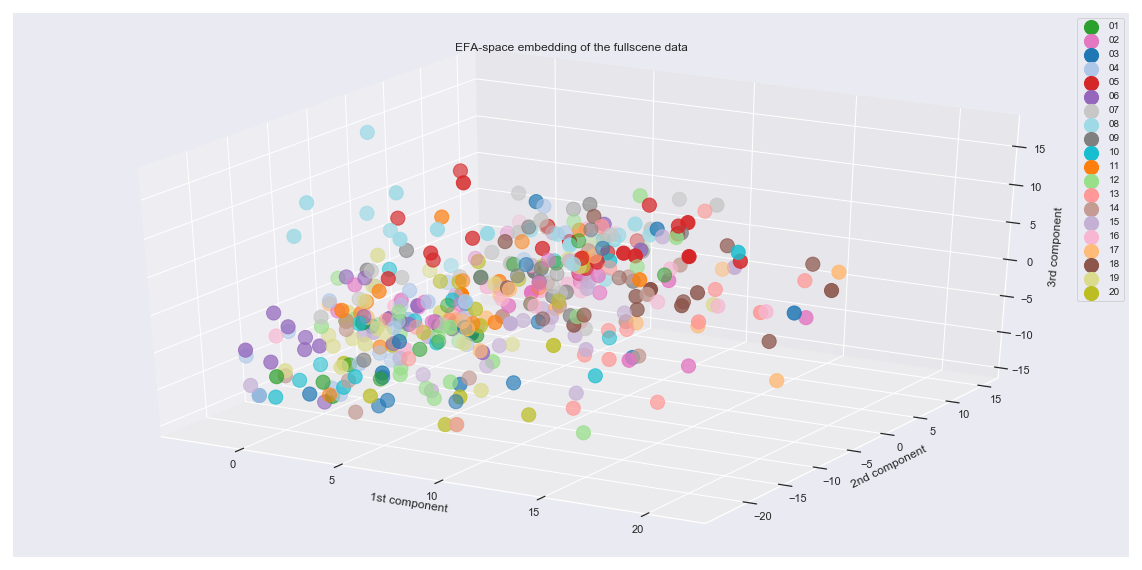

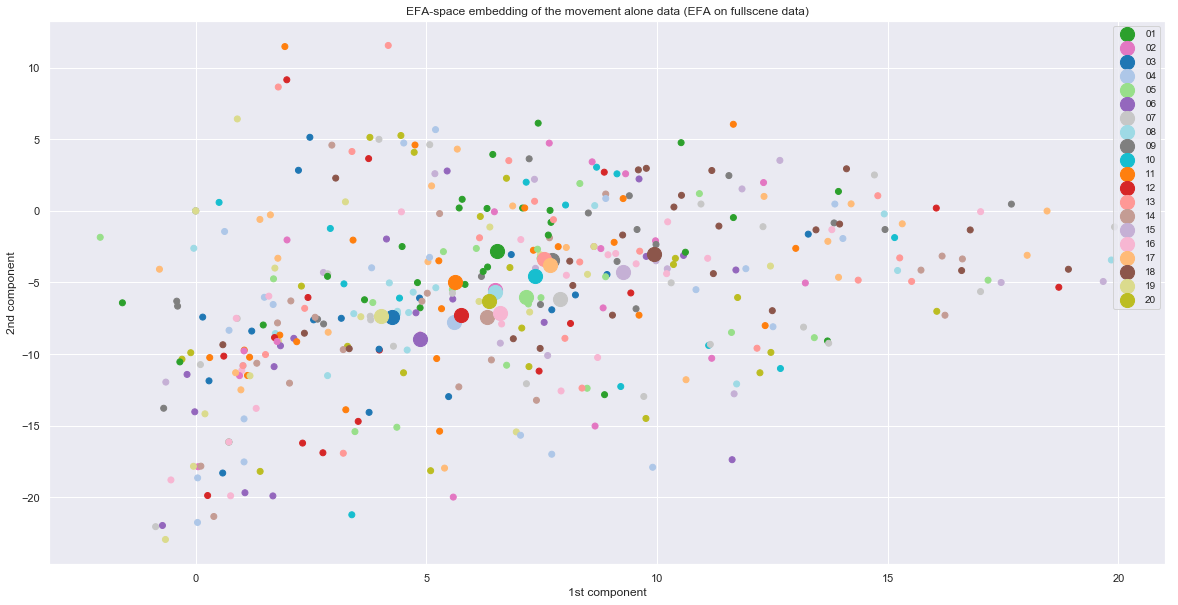

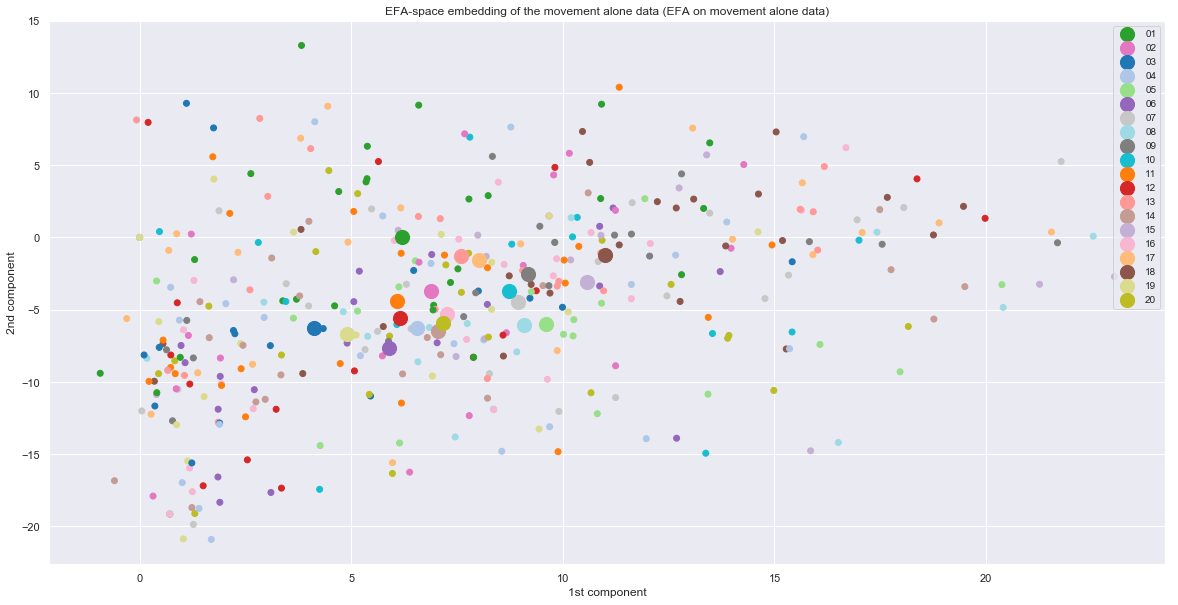

In [31]:
nb_of_factors=6
fullscene_efa = np.dot(fullscene,fullscene_loadings.values[:,:nb_of_factors])
fullscene_means_efa = np.dot(fullscene_means,fullscene_loadings.values[:,:nb_of_factors])
move_efa = np.dot(move,fullscene_loadings.values[:,:nb_of_factors])
move_means_efa = np.dot(move_means,fullscene_loadings.values[:,:nb_of_factors])

move_pure_efa = np.dot(move,move_loadings.values[:,:nb_of_factors])
move_pure_means_efa = np.dot(move_means,move_loadings.values[:,:nb_of_factors])


plot_embedding(fullscene_efa, fullscene_labels,fullscene_means_efa, fullscene_means.index, title="EFA-space embedding of the fullscene data", three_d=True)
plot_embedding(move_efa, move_labels,move_means_efa, move_means.index, title="EFA-space embedding of the movement alone data (EFA on fullscene data)", three_d=False)
plot_embedding(move_pure_efa, move_labels,move_pure_means_efa, move_means.index, title="EFA-space embedding of the movement alone data (EFA on movement alone data)", three_d=False)


Interestingly, even if the EFA factors are quite similar, the distances between the same clips in fullscene vs movement alone data are high in the EFA space:

In [32]:
distances_efa=pd.DataFrame(np.power(np.sum(np.power(move_means_efa - fullscene_means_efa, 2), axis=1), 0.5), index=move_means.index, columns=["distance_efa"])

print("Mean distance:\n%s" % distances_efa.mean(axis=0))
show_heatmap(distances_efa, cmap="summer_r")

Mean distance:
distance_efa    3.428116
dtype: float64


,distance_efa
clipId,
01,6.67003
02,1.64351
03,1.98804
04,4.6131
05,2.23726
06,4.56893
07,4.53029
08,1.74438
09,2.6114


## Social Expressivness of the EFA Embeddings

We can now attempt to cluster our 20 clips into 'groups' of similar clips (based on the latent constructs):

,cluster #
clipId,
02,0
17,0
16,0
09,0
04,1
06,1
05,2
08,2
01,3


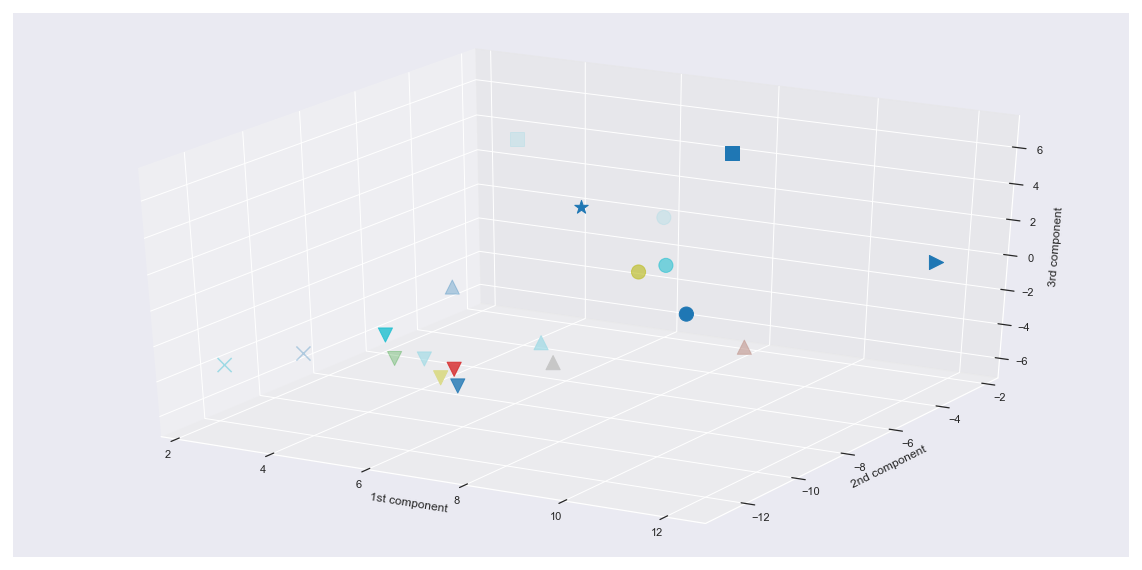

In [33]:
from sklearn.cluster import KMeans

# kMeans clustering after projecting our clips into the EFA-space
fullscene_clustering_data=fullscene_means_efa

nb_clusters=7 #arbitrary number of clusters

fullscene_kmeans_model = KMeans(n_clusters=nb_clusters, random_state=0).fit(fullscene_clustering_data)
fullscene_kmeans = fullscene_kmeans_model.predict(fullscene_clustering_data)

plot_embedding(fullscene_clustering_data,fullscene_means.index,clusters=fullscene_kmeans, three_d=True)

pd.DataFrame(fullscene_kmeans, index=fullscene_means.index, columns=["cluster #"]).sort_values(by="cluster #")

We should be able to infer the semantics of the first 3 EFA factors.

We can then try to predict in which cluster the clips would end up, using only the ratings from the movement alone videos:

In [34]:
move_means_efa.shape

(20, 3)

7 movement alone clips out of 20 (35.0%) are predicted to fall into the same cluster as their 'fullscene' counterpart.


,fullscene clusters,movement clusters,same,kripp alpha std,kripp alpha mean,Fullscene alpha,Movement-Alone alpha
clipId,,,,,,,
09,0,4,False,0.0280486,0.0776562,0.0974896,0.0578229
07,4,5,False,0.102169,0.163664,0.0914201,0.235908
02,0,5,False,0.063052,0.225305,0.18072,0.269889
17,0,0,True,0.0633495,0.227733,0.272528,0.182938
16,0,5,False,0.0567452,0.232099,0.191974,0.272224
10,3,4,False,0.219404,0.241284,0.396426,0.0861424
11,5,0,False,0.0326347,0.257414,0.280491,0.234338
13,5,0,False,0.10236,0.261617,0.333996,0.189237
05,2,2,True,0.0314335,0.305662,0.327889,0.283435


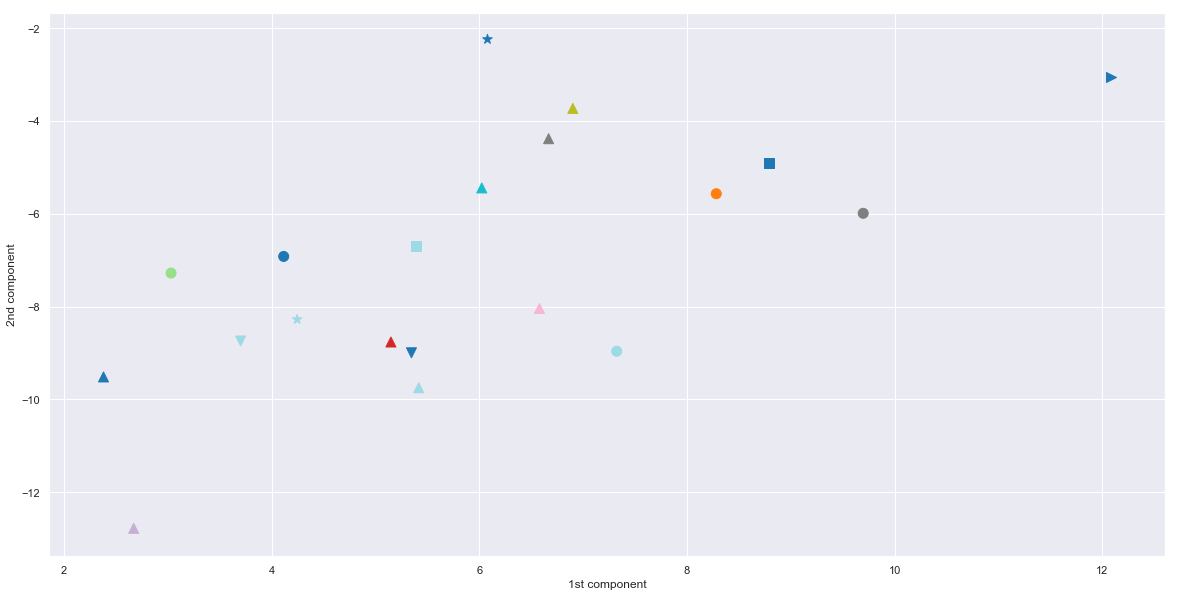

In [35]:
move_kmeans= fullscene_kmeans_model.predict(move_means_efa)

plot_embedding(fullscene_means_efa, move_means.index, clusters=move_kmeans, three_d=False)

diff=pd.DataFrame(fullscene_kmeans-move_kmeans,index=move_means.index)
print("%d movement alone clips out of %d (%.1f%%) are predicted to fall into the same cluster as their 'fullscene' counterpart." % (diff[diff==0].count(), move_kmeans.size, diff[diff==0].count() * 100. / move_kmeans.size))

clusters_kripp=pd.DataFrame([fullscene_kmeans, move_kmeans, fullscene_kmeans==move_kmeans,krippendorff_df[["Fullscene alpha", "Movement-Alone alpha"]].std(axis=1).astype(float), krippendorff_df[["Fullscene alpha", "Movement-Alone alpha"]].mean(axis=1).astype(float), krippendorff_df["Fullscene alpha"], krippendorff_df["Movement-Alone alpha"], ],index=["fullscene clusters", "movement clusters", "same", "kripp alpha std", "kripp alpha mean", "Fullscene alpha", "Movement-Alone alpha"],columns=move_means.index).T.sort_values(by="kripp alpha mean")
clusters_kripp

Is there a correlation between 'same clusters' and Krippendorf agreement (ie, consistency of ratings for a given clip)? No...

In [36]:
print("Mean Krippendorf, same cluster: %f" % clusters_kripp[clusters_kripp["same"] == True]["kripp alpha mean"].mean())
print("Std Krippendorf, same cluster: %f" % clusters_kripp[clusters_kripp["same"] == True]["kripp alpha mean"].std())
print("Mean Krippendorf, diff cluster: %f" % clusters_kripp[clusters_kripp["same"] == False]["kripp alpha mean"].mean())
print("Std Krippendorf, diff cluster: %f" % clusters_kripp[clusters_kripp["same"] == False]["kripp alpha mean"].std())

Mean Krippendorf, same cluster: 0.320151
Std Krippendorf, same cluster: 0.048791
Mean Krippendorf, diff cluster: 0.273490
Std Krippendorf, diff cluster: 0.089409


Adding the EFA projections to the original dataframes:

In [37]:
fullscene_df["efa1"] = pd.Series(fullscene_efa[:,0], index=fullscene_df.index)
fullscene_df["efa2"] = pd.Series(fullscene_efa[:,1], index=fullscene_df.index)
fullscene_df["efa3"] = pd.Series(fullscene_efa[:,2], index=fullscene_df.index)
move_df["efa1"] = pd.Series(move_efa[:,0], index=move_df.index)
move_df["efa2"] = pd.Series(move_efa[:,1], index=move_df.index)
move_df["efa3"] = pd.Series(move_efa[:,2], index=move_df.index)

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [38]:
nb_iterations = 20

print("Fullscene, 80%/20%...")
results_fullscene,labels_f1_fullscene = run_classification(fullscene_df, iterations=nb_iterations)
print("Fullscene, 80%/20%, EFA space...")
results_fullscene_efa,labels_f1_fullscene_efa = run_classification(fullscene_df, cols=["efa1", "efa2", "efa3"], iterations=nb_iterations)
print("Fullscene, chance level...")
results_fullscene_chance,labels_f1_fullscene_chance = run_classification(fullscene_df, random_labels=True, iterations=nb_iterations)
print("Fullscene, 80%/20%, sanity check [input cols=['age']]...")
results_fullscene_age,labels_f1_fullscene_age = run_classification(fullscene_df, cols=["age"], iterations=nb_iterations)

print("Fullscene vs skeletons...")
results_fullscene_move,labels_f1_move = run_classification(fullscene_df, testing=move_df, iterations=nb_iterations)
print("Fullscene vs skeletons, EFA space...")
results_fullscene_move_efa,labels_f1_move_efa = run_classification(fullscene_df, testing=move_df, cols=["efa1", "efa2", "efa3"], iterations=nb_iterations)
print("Fullscene vs skeletons, chance level...")
results_fullscene_move_chance,labels_f1_move_chance = run_classification(fullscene_df, testing=move_df, random_labels=True, iterations=nb_iterations)

collated_results = pd.DataFrame({"Full-scene, EFA space": results_fullscene_efa.mean(),
                                 "Full-scene": results_fullscene.mean(),
                                 "Full-scene, chance": results_fullscene_chance.mean(),
                                 #"Full-scene-80-20-sanity-check": results_fullscene_age.mean(),
                                 "Movement-alone, EFA space": results_fullscene_move_efa.mean(),
                                 "Movement-alone": results_fullscene_move.mean(),
                                 "Movement-alone, chance": results_fullscene_move_chance.mean()})
labels_f1 = pd.concat({"Full-scene, EFA space": labels_f1_fullscene_efa,
                       "Full-scene": labels_f1_fullscene,
                       "Full-scene, chance": labels_f1_fullscene_chance,
                       #"fullscene-80-20-sanity-check": labels_f1_fullscene_age,
                       "Movement-alone, EFA": labels_f1_move_efa,
                       "Movement-alone": labels_f1_move,
                       "Movement-alone, chance": labels_f1_move_chance}, axis=1)

Fullscene, 80%/20%...
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Fullscene, 80%/20%, EFA space...
Shape of training data: (316, 3)
Shape of testing data: (80, 3)
Fullscene, chance level...
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Fullscene, 80%/20%, sanity check [input cols=['age']]...
Shape of training data: (316, 1)
Shape of testing data: (80, 1)
Fullscene vs skeletons...
Shape of training data: (396, 30)
Shape of testing data: (400, 30)
Fullscene vs skeletons, EFA space...
Shape of training data: (396, 3)
Shape of testing data: (400, 3)
Fullscene vs skeletons, chance level...
Shape of training data: (396, 30)
Shape of testing data: (400, 30)


In [39]:
print((collated_results*100).round(1).transpose().to_latex(bold_rows=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Precision &  Recall &  F1-measure \\
\midrule
\textbf{Full-scene, EFA space    } &      11.2 &       41.5 &    26.9 &        31.1 \\
\textbf{Full-scene               } &       7.5 &       39.3 &    25.8 &        30.1 \\
\textbf{Full-scene, chance       } &       3.7 &       26.2 &    13.9 &        17.3 \\
\textbf{Movement-alone, EFA space} &      11.7 &       35.1 &    27.0 &        30.3 \\
\textbf{Movement-alone           } &      15.8 &       41.6 &    32.7 &        36.3 \\
\textbf{Movement-alone, chance   } &       4.2 &       28.6 &    14.7 &        18.5 \\
\bottomrule
\end{tabular}



In [40]:
fullscene = labels_f1.loc[:, 'Full-scene']
fullsceneEFA = labels_f1.loc[:, 'Full-scene, EFA space']
fullsceneChance = labels_f1.loc[:, 'Full-scene, chance']
movement = labels_f1.loc[:, 'Movement-alone']
movementEFA = labels_f1.loc[:, 'Movement-alone, EFA']
movementChance = labels_f1.loc[:, 'Movement-alone, chance']

collated_labels = pd.DataFrame([fullsceneEFA.mean(axis=0)])
collated_labels = collated_labels.append([fullscene.mean(axis=0)],ignore_index=True)
collated_labels = collated_labels.append([fullsceneChance.mean(axis=0)],ignore_index=True)
collated_labels = collated_labels.append([movementEFA.mean(axis=0)],ignore_index=True)
collated_labels = collated_labels.append([movement.mean(axis=0)],ignore_index=True)
collated_labels = collated_labels.append([movementChance.mean(axis=0)],ignore_index=True)

collated_labels.rename(index={0:'Fullscene, EFA',1:'Fullscene',2:'Chance',
                              3:'Movement alone, EFA',4:'Movement alone',5:'Chance'}, inplace=True)
collated_labels

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
"Fullscene, EFA",0.408163,0.277778,0.705882,0.285714,0.204082,0.176471,0.333333
Fullscene,0.333333,0.214286,0.600000,0.275862,0.297872,0.368421,0.000000
Chance,0.207274,0.112279,0.141936,0.159553,0.229309,0.173077,0.114819
"Movement alone, EFA",0.364964,0.240000,0.492308,0.246305,0.337079,0.273810,0.122449
Movement alone,0.437276,0.193548,0.584615,0.295918,0.433824,0.312139,0.274510
Chance,0.196001,0.165923,0.112850,0.188838,0.228402,0.168037,0.114268


In [41]:
print((collated_labels*100).round(1).to_latex(bold_rows=True))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  Aggressive &  Aimless &  Bored &  Cooperative &  Dominant &  Excited &   Fun \\
\midrule
\textbf{Fullscene, EFA     } &        40.8 &     27.8 &   70.6 &         28.6 &      20.4 &     17.6 &  33.3 \\
\textbf{Fullscene          } &        33.3 &     21.4 &   60.0 &         27.6 &      29.8 &     36.8 &   0.0 \\
\textbf{Chance             } &        20.7 &     11.2 &   14.2 &         16.0 &      22.9 &     17.3 &  11.5 \\
\textbf{Movement alone, EFA} &        36.5 &     24.0 &   49.2 &         24.6 &      33.7 &     27.4 &  12.2 \\
\textbf{Movement alone     } &        43.7 &     19.4 &   58.5 &         29.6 &      43.4 &     31.2 &  27.5 \\
\textbf{Chance             } &        19.6 &     16.6 &   11.3 &         18.9 &      22.8 &     16.8 &  11.4 \\
\bottomrule
\end{tabular}

